# Neutron Diffusion Simulation in a nuclear reactor core

Simulates the 1D neutron diffusion equation to model neutron flux across a reactor core.
Solves the simplified steady-state diffusion equation:

d*2 ϕ(x)/dx*2 - ϕ(x)/L*2 = -S/D

L is length of diffusion

D is diffusion coefficient

S is neuton source term

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#problem parameters
length = 100   #in cm, legth of core
n = 100    #no of discrete points
h = length / (n-1)      #step size
D = 1.0
L= 10.0
S = 1.0

In [4]:
A =np.zeros((n , n))   #matrix A
b = np.zeros(n)         #rhs vector b

In [5]:
A[0][0] = 1   #Boundary cdns: 0 flux at both ends of core
A[-1][-1] = 1
b[0] = 0
b[-1] = 0

In [6]:
for i in range(1, n-1):
  A[i][i-1] = 1/h**2
  A[i][i] = -2/h**2 -1/L**2
  A[i][i+1] = 1/h**2
  b[i] = -S/D

In [7]:
#solving this sytem now
phi = np.linalg.solve(A, b)

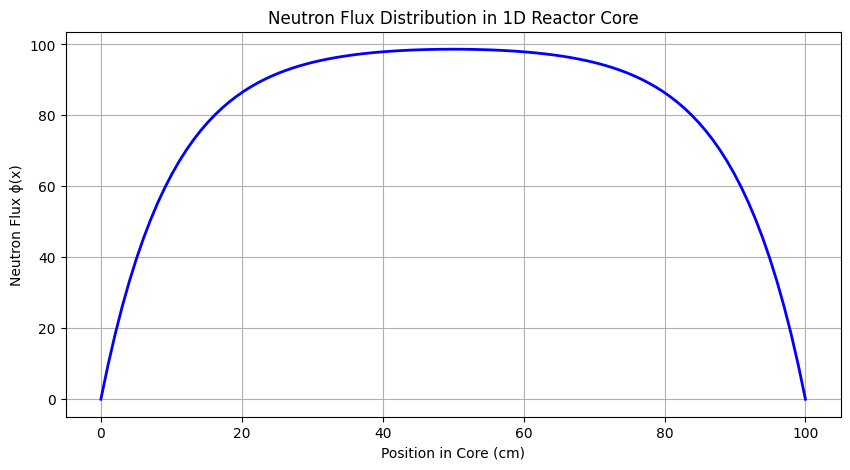

In [8]:
#plot
x = np.linspace(0, length, n)
plt.figure(figsize=(10, 5))
plt.plot(x, phi, color='blue', linewidth=2)
plt.title("Neutron Flux Distribution in 1D Reactor Core")
plt.xlabel("Position in Core (cm)")
plt.ylabel("Neutron Flux ϕ(x)")
plt.grid(True)
plt.show()